## UCI SECON Dataset

제조 공정 특성 선택 및 분류

개요: 반도체 제조 공정의 데이터

데이터 집합 특성: 다변량
row : 1567개
column : 591개

데이터 구성
독립 변수 : 수치형
종속 변수 : 이산형

데이터 특징
결측값 존재
타임 스탬프 존재
다수의 독립 변수 존재(591개)
종속 변수가 존재하고, 이산형임에 따라 분류 알고리즘 사용

데이터 내용
반도체 제조 공정에서 여러가지 센서 데이터가 존재하고, 그 센서 데이터와 종속된 결과가 존재.
결과는 -1이 정상, 1이 비정상으로 구분되어 있음.
데이터 타임스탬프는 해당 특정 시험 지점에 대한 것.


In [1]:
import pandas as pd
import numpy as np

uci = pd.read_csv("uci-secom.csv")
uci.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


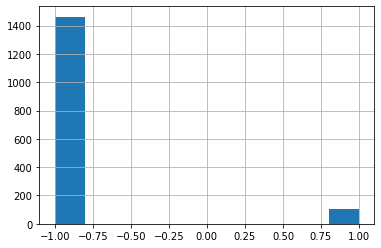

In [2]:
uci['Pass/Fail'].hist()

In [3]:
uci['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [4]:
uci.dropna(axis=1)

,Time,20,86,87,88,113,114,115,116,117,...,527,570,571,572,573,574,575,576,577,Pass/Fail
0,2008-07-19 11:55:00,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,-1
1,2008-07-19 12:32:00,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,-1
2,2008-07-19 13:17:00,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,2008-07-19 14:43:00,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,-1
4,2008-07-19 15:22:00,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,1.4072,2.3762,0.9861,1869.4215,0.9520,0.0,727.6761,0.9894,58.3514,...,2.6649,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879,11.7256,-1
1563,2008-10-16 20:49:00,1.3949,2.4880,0.9911,1872.5133,0.9561,0.0,755.7527,0.9899,57.1020,...,6.0192,537.9264,2.1814,5.48,0.3891,1.9077,0.1213,1.0187,17.8379,-1
1564,2008-10-17 05:26:00,1.4256,2.4590,0.9869,1820.3629,0.9488,0.0,704.2686,0.9891,59.2046,...,5.4641,530.3709,2.3435,6.49,0.4154,2.1760,0.1352,1.2237,17.7267,-1
1565,2008-10-17 06:01:00,1.3868,2.3600,0.9796,1627.4714,0.9485,0.0,605.6190,0.9896,58.2686,...,6.5512,534.3936,1.9098,9.13,0.3669,3.2524,0.1040,1.7085,19.2104,-1


- 결측치 기준으로 값을 삭제하는건 원본 데이터의 반을 날려버리는 무모한 행위라고 판단되어 해당 컬럼의 평균값으로 대체
- 열 기준이 아닌 행 기준에서는 데이터에 큰 영향을 주진 않지만 데이터 원본의 훼손하는 일이라고 판단하여 평균값으로 대체함

In [5]:
uci.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [6]:
uci = uci.fillna(uci.mean())

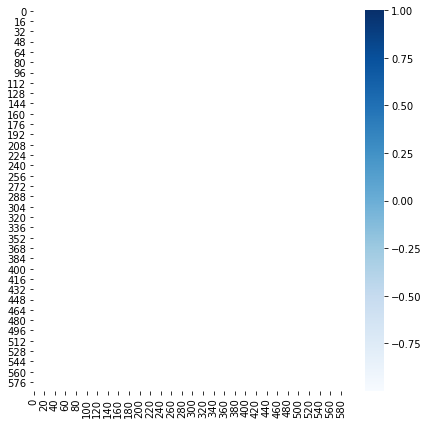

In [7]:
kmeans_uci = uci.drop(['Time','Pass/Fail'],axis=1)

import seaborn as sns    
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(data = kmeans_uci.corr(), annot=False,
fmt = '.2f', linewidths=.5, cmap='Blues')

### 결측치 때문에 정상적으로 산출이 안되는 상황


In [8]:
kmeans_uci.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Length: 590, dtype: int64

### 데이터 자체는 결측치가 없으나 상관계수 출력하는 과정에서 결측치 존재

In [9]:
kmeans_uci.corr()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,NaN,0.002270,0.031483,-0.052622,0.009045,...,-0.042208,-0.017120,0.000224,0.023453,0.019907,0.023589,0.018443,-0.025880,-0.028166,0.004174
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,NaN,-0.025564,-0.012037,0.031258,0.023964,...,0.047372,0.054006,0.043556,0.002904,-0.001264,0.002273,-0.009403,0.017266,0.010118,0.044797
2,0.004756,0.005767,1.000000,0.298935,0.095891,NaN,-0.136225,-0.146213,0.023528,0.016168,...,-0.012402,-0.007054,-0.006023,0.015697,0.018225,0.015752,-0.025495,-0.029345,-0.030818,-0.032890
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,NaN,-0.685835,0.073856,-0.102892,0.068215,...,-0.042177,-0.071311,0.008988,0.025436,0.024736,0.026019,0.034711,-0.039132,-0.033645,-0.080341
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.347734,-0.025946,0.054206,...,-0.041256,0.088167,0.045081,-0.001300,-0.001597,-0.001616,-0.043929,-0.031005,-0.026100,0.050910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.023589,0.002273,0.015752,0.026019,-0.001616,NaN,-0.039517,0.010337,0.017925,-0.036109,...,-0.000277,-0.000471,-0.197363,0.999890,0.995342,1.000000,0.002743,-0.002930,-0.002530,-0.003800
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,NaN,-0.041209,0.058113,0.010433,0.033738,...,0.148954,-0.283333,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,NaN,0.034027,-0.021426,0.022845,0.059301,...,0.670390,0.272404,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,NaN,0.032227,-0.020893,0.026250,0.060758,...,0.682405,0.258745,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211


In [10]:
kmeans_uci.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


- 상관계수로 정상적인 결과가 출력되지 않음
- PCA등의 차원 축소기법의 결과를 기대하기 어려운 상황
- -> 클러스터링으로 변수간 관계를 통해 케이스를 나눠서 분석시행

In [11]:
kmeans_uci = kmeans_uci.T

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans().fit(kmeans_uci)

In [13]:
pd.Series(kmeans.labels_).describe()

count    590.000000
mean       0.066102
std        0.521884
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        7.000000
dtype: float64

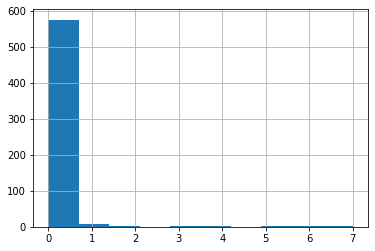

In [14]:
pd.Series(kmeans.labels_).hist()

In [15]:
pd.Series(kmeans.labels_).value_counts()

0    575
1      8
4      2
7      1
6      1
5      1
3      1
2      1
dtype: int64

- 클러스터링 결과 대다수의 변수가 0으로 쏠리고 그렇지 않은 소수의 클러스터가 존재함을 확인
- kmeans_uci table에 cluster_id라는 파생변수 추가하여 클러스터별 데이터 분기 작업 시행

In [16]:
kmeans_uci['cluster_id']= kmeans.labels_

In [17]:
pd.Series(kmeans.labels_).value_counts()

0    575
1      8
4      2
7      1
6      1
5      1
3      1
2      1
dtype: int64

- 레이블 확인 결과, 대부분의 column이 0의 클러스터를 가지고 나머지는 각각의 계수를 가짐
- 이를 토대로 cluster_id 계수로 데이터 분기 진행

### Clustering 결과 7개의 군집으로 분기

- 16개의 컬럼으로 이루어진 결과.
- 두 집단의 columns의 수가 달라 학습결과 비교분석 불가능
- 이에 따라 일반 데이터로 Decision Tree 학습 진행

In [18]:
from sklearn.model_selection import train_test_split

x = uci.iloc[:,1:-1]
y = uci.iloc[:,-1]

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.33,random_state=123)

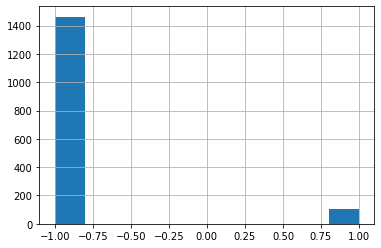

In [19]:
y.hist()

In [20]:
train_x.shape

(1049, 590)

In [21]:
test_x.shape

(518, 590)

In [22]:
train_y

939    -1
1065   -1
798    -1
177    -1
386    -1
       ..
1122   -1
1346   -1
1406   -1
1389   -1
1534   -1
Name: Pass/Fail, Length: 1049, dtype: int64

In [23]:
test_y

906    -1
987    -1
929     1
1118   -1
623    -1
       ..
67     -1
1424   -1
579    -1
691    -1
1362   -1
Name: Pass/Fail, Length: 518, dtype: int64

### Decision Tree 분석
- 클러스터링 기법을 통해 원본 데이터의 column을 분기한 후 분석 시행
- 종속변수의 정상 비율이 워낙 높아 과적합의 가능성 존재

In [24]:
from sklearn.tree import DecisionTreeClassifier

sample_ratio = 0.03
min_sample_leaf = round(sample_ratio * len(train_x))
tree = DecisionTreeClassifier(criterion = 'gini',max_depth=1000 ,random_state = 123, min_samples_leaf=min_sample_leaf)
tree.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=31, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

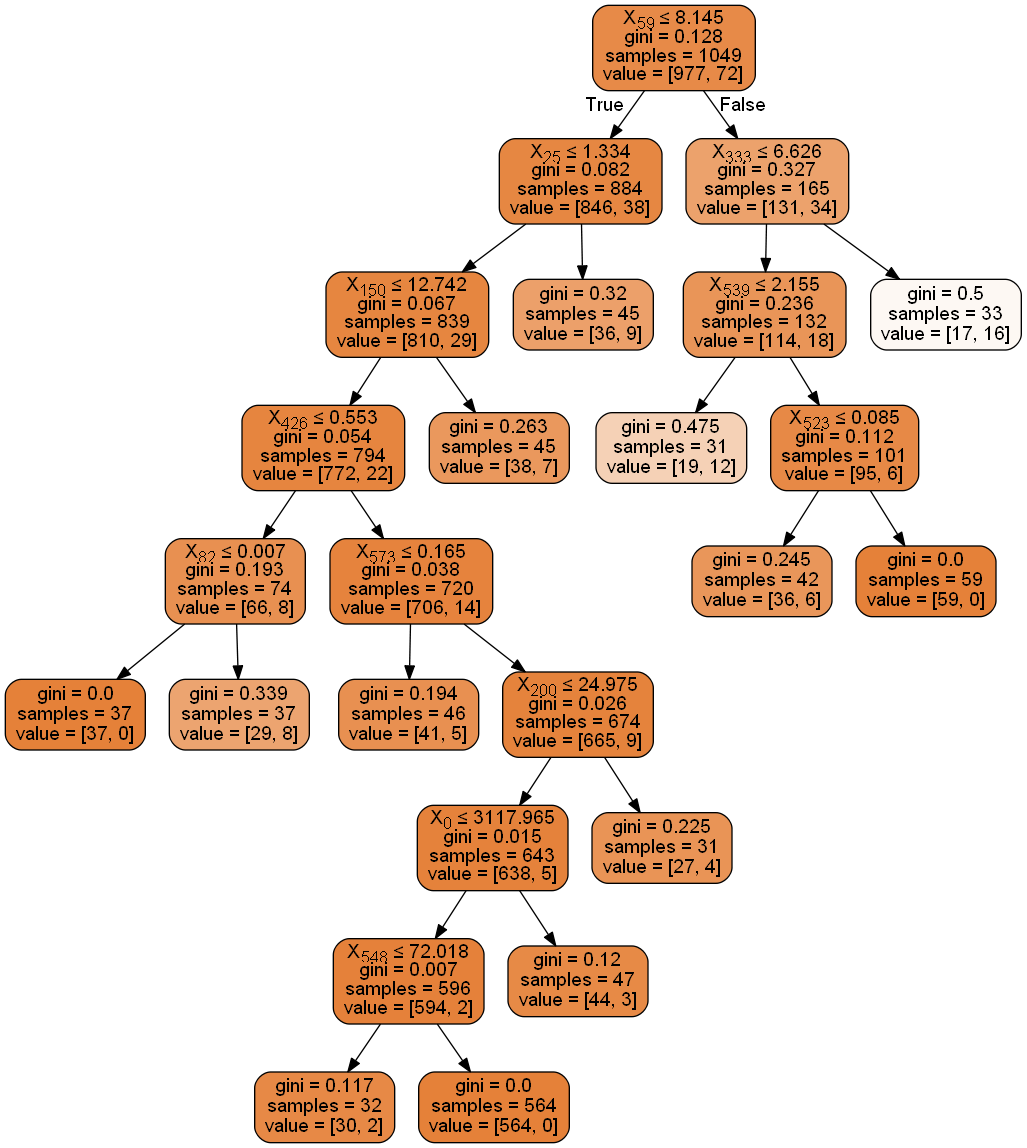

In [25]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [26]:
pred = tree.predict(test_x)

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(test_y, pred))

Accuracy: 0.94


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, pred)
print(confusion_matrix)


[[486   0]
 [ 32   0]]


- 정상의 비율이 워낙 많고 불량의 비율이 적어서 정상을 많이 맞춤

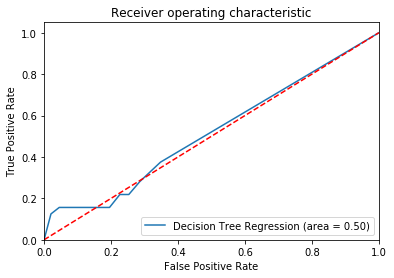

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, pred)
fpr, tpr, thresholds = roc_curve(test_y, tree.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Decision Tree_ROC.png')
plt.show()

- columns의 수가 문제가 아닌 종속변수의 비율이 너무 낮아 문제 발생
- 단순한 분류 문제가 아닌 이상치 탐지 문제로 해결해야 함.
- Isolation Forest라는 모델을 통해 이상 탐지 진행

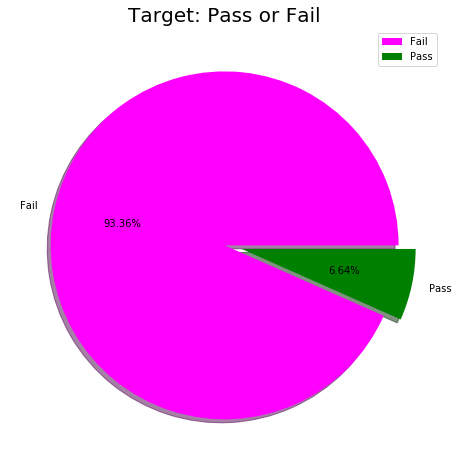

In [30]:
# pie chart

labels = ['Fail', 'Pass']
size = uci['Pass/Fail'].value_counts()
colors = ['magenta', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

- 정상 데이터 : 93.36%
- 비정상 데이터 : 6.64

### Decision Tree 분석 결과
- Accuracy가 높은 이유는 정답인 데이터를 많이 맞췄기 때문
- 하지만 불량을 거의 예측하지 못함
- 이에 따라 AUC Curve의 그래프가 좋지 못함을 확인함

=> 클러스터링을 통한 변수 분리가 이상치 분석에 좋은 영향을 끼치지 않음을 확인

### Xgboost와 결과 비교

- 같은 트리모델을 사용하는 xgboost 알고리즘과 비교 분석 시행

In [31]:
!pip install xgboost

In [32]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()

model.fit(train_x, train_y)

y_pred = model.predict(test_x)

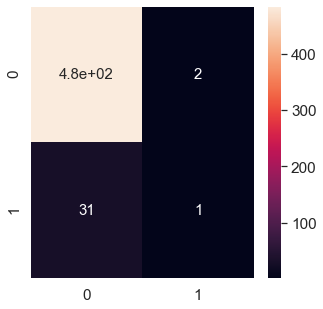

In [33]:
from sklearn.metrics import confusion_matrix

xgboost_cm = confusion_matrix(test_y, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(xgboost_cm, annot = True, annot_kws = {"size": 15})


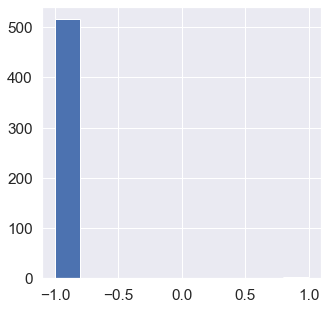

In [34]:
pd.Series(y_pred).hist()

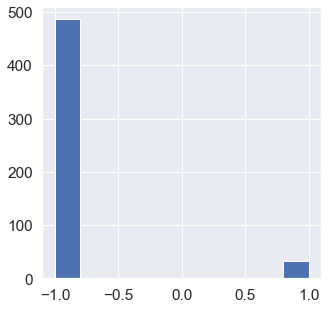

In [35]:
test_y.hist()

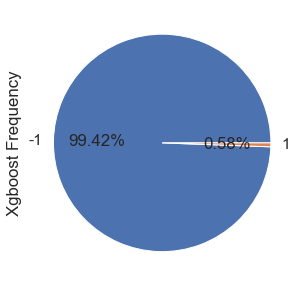

In [36]:
pd.Series(y_pred, name = "Xgboost Frequency").value_counts().plot.pie(autopct='%.2f%%')

### Xgboost의 경우, 한 개의 이상치밖에 탐지하지 못함
- 이에 따른 이상치 탐지 모델의 결과와 비교분석 시행

### Isolation Forest

- 다차원 데이터셋에서 효율적으로 작동하는 아웃라이어 제거 방법
- 의사결정 트리기반 이상탐지 기법
- 랜덤하게 칼럼을 선택하고, 선택된 칼럼의 최대값과 최소값을 분리하는 값을 랜덤으로 선택하는 방법
- 여러 트리모델에서 이상지수를 계산하여 정상/비정상 판단 유무를 결정
- 일반 분류기 모델과 다르게 이상치 비율을 하이퍼 파라미터로 보유하고 있음
- https://dodonam.tistory.com/129

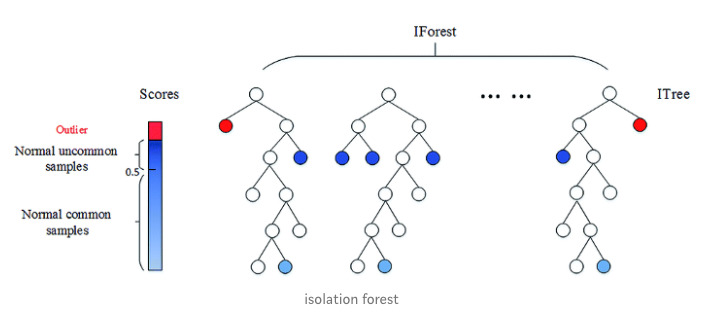

In [37]:
from sklearn.ensemble import IsolationForest
x = uci.iloc[:, 1:-1]
y = uci.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Fraud = uci[uci['Pass/Fail']==1]
Valid = uci[uci['Pass/Fail']==-1]

# 이상치 비율 설정
outlier_fraction = len(Fraud)/float(len(Valid))

model = IsolationForest(n_estimators=100, max_samples=len(x_train), 
                                       contamination=outlier_fraction, random_state=0, verbose=0)
model.fit(x_train, y_train)
scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test)

In [38]:
# 이상지수 출력
scores_prediction

array([0.02026671, 0.03830096, 0.02118977, ..., 0.03389381, 0.04342053,
       0.03602989])

**sklearn에서 predict를 한 결과는 이상치 -1, 정상치 1로 반환하여 리턴하고 있음**
- 정상적인 confusion matrix 출력을 위해 예측치에 -1 곱한 값을 return


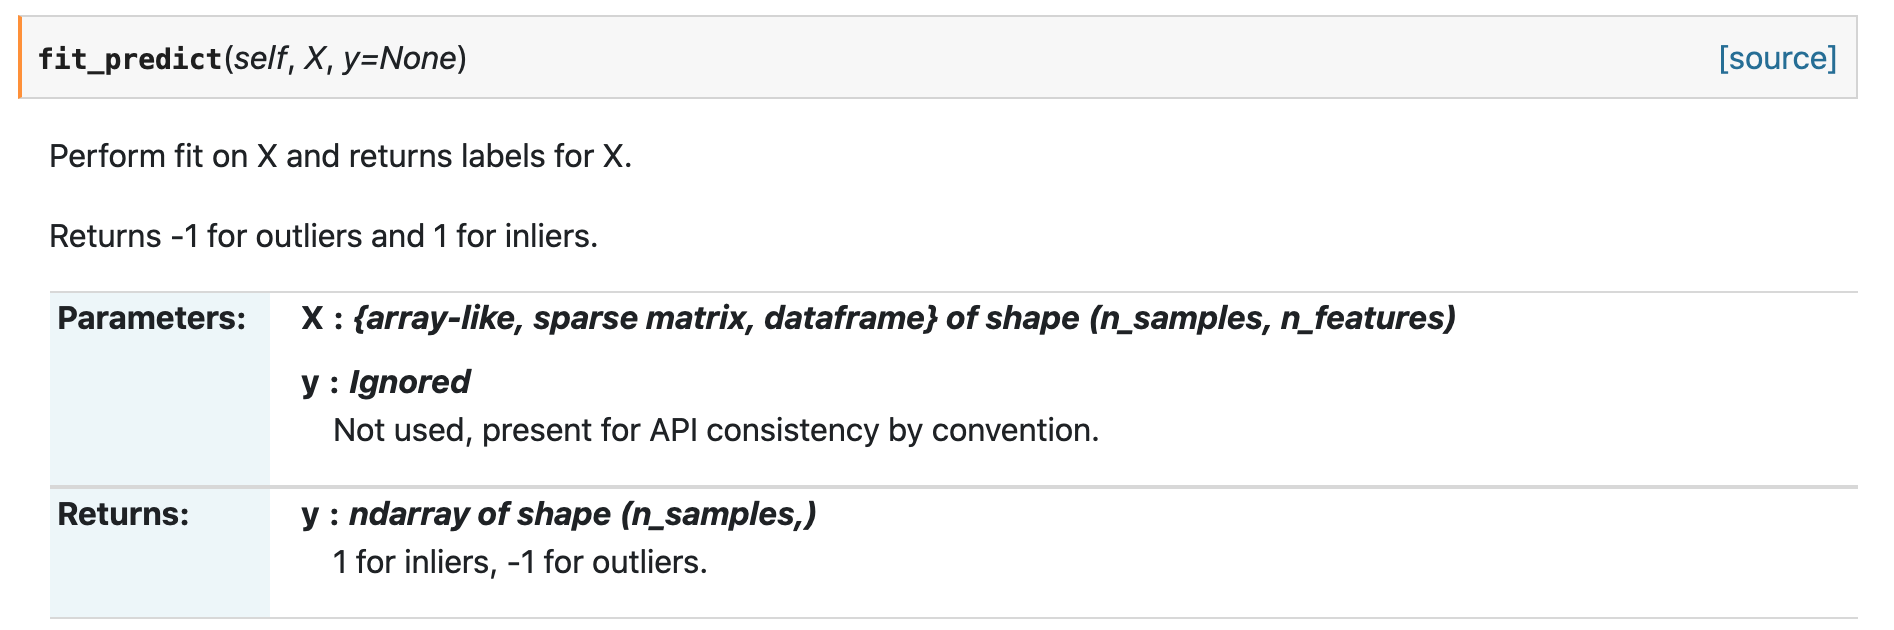

In [39]:
y_pred = y_pred * -1

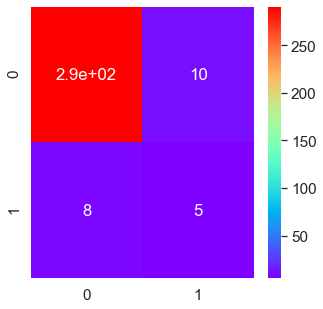

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot = True, cmap = 'rainbow')

- 타 알고리즘에 비해 정상적으로 불량 데이터를 예측한 모습 관측
- model.decision_function()을 통해 각 트리별로 불량비율을 산출할 수 있음

In [41]:
scores_prediction

array([0.02026671, 0.03830096, 0.02118977, ..., 0.03389381, 0.04342053,
       0.03602989])

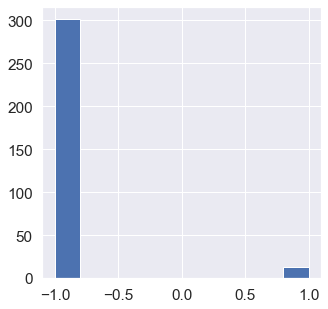

In [42]:
y_test.hist()

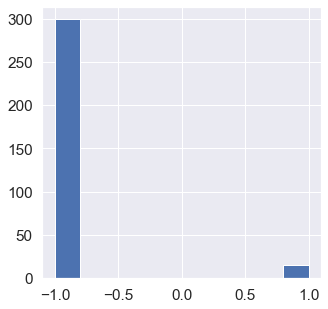

In [43]:
pd.Series(y_pred).hist()

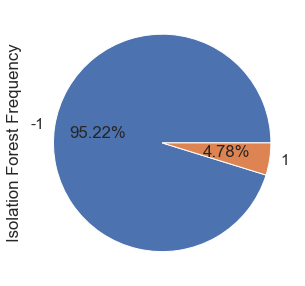

In [44]:
pd.Series(y_pred, name = "Isolation Forest Frequency").value_counts().plot.pie(autopct='%.2f%%')

### Result

- 정상 데이터 : 93.36%
- 비정상 데이터 : 6.64%

- Isolation Forest 정상 : 95.22% (+1.86%)
- Isolation Forest 비정상 : 4.78% (-1.86%)

#### 분석 결과

* 타임 스탬프를 무시하고 이상치 탐지 알고리즘을 통해 좋은 결과를 낳을 수 있다.
* 단일 모델로는 좋은 성능을 기대하기 힘들며, 앙상블 알고리즘 역시 좋은 결과를 기대하기 힘들다

### LOF(Local Outlier Factor)

- 데이터간의 간격, 군집간의 간격 두 가지 척도를 통해 이상치를 탐지하는 알고리즘.
- 척도를 통해 LOF Score를 산출하여, 이를 이상치로 판단하는 Threshold로 사용할 수 있음.
- 굉장히 밀집된 클러스터에서 조금만 떨어져 있어도 이상치로 탐지해준다는 장점 보유.
- https://jayhey.github.io/novelty%20detection/2017/11/10/Novelty_detection_LOF/


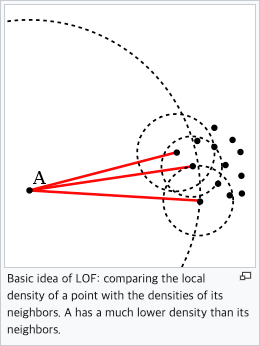   
< 척도중 하나인 k-distance에 관한 그림>

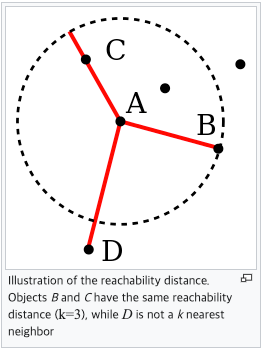   
< 척도중 하나인 reachability distance에 관한 그림>

In [45]:
from sklearn.neighbors import LocalOutlierFactor


model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=outlier_fraction)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)

In [46]:
y_pred = y_pred * -1

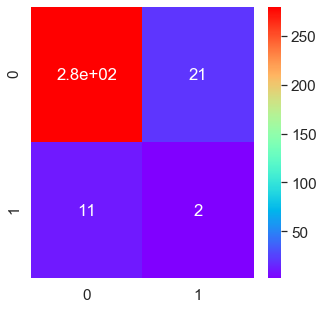

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot = True, cmap = 'rainbow')

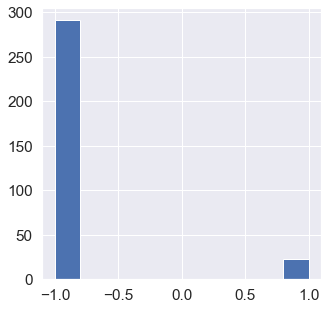

In [48]:
pd.Series(y_pred).hist()

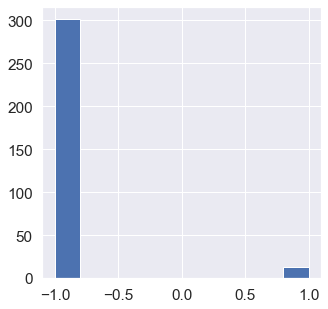

In [49]:
y_test.hist()

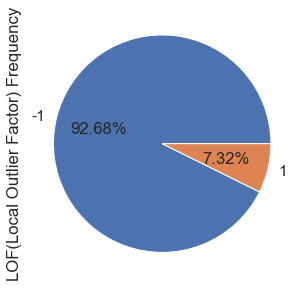

In [50]:
pd.Series(y_pred, name = "LOF(Local Outlier Factor) Frequency").value_counts().plot.pie(autopct='%.2f%%')

### Result

- 정상 데이터 : 93.36%
- 비정상 데이터 : 6.64%

- LOF 정상 : 92.68% (+0.68%)
- LOF 비정상 : 7.32% (-0.68%)

### OneClassSVM

- 데이터가 존재하는 영역을 추출하고, 이 영역을 서포트 벡터로 표현하며 표현된 영역 밖의 데이터들은 아웃라이어(outlier)로 간주하는 알고리즘

- Novelty를 위한 방법론으로 처음 관측 분포의 윤곽선을 새로운 차원 공간에 그려 놓고 추가 관측치가 경계로부터 구분된 공간 내에 있으면 초기 관측치와 같은 집단, 그렇지 않으면 비정상 데이터라고 간주

- 이상치 탐지를 하는 가장 기초적인 알고리즘. 이 논문을 토대로 딥러닝에 이상치 탐지 방법론을 적용한 Deep SVNN 알고리즘 존재

- 데이터가 고차원일수록 처리시간이 증가하는 SVM의 단점 존재

- https://jjhwqqq.tistory.com/172

- https://flonelin.wordpress.com/2017/03/29/novelty%EC%99%80-outlier-detection/

In [51]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)
y_pred = y_pred * -1

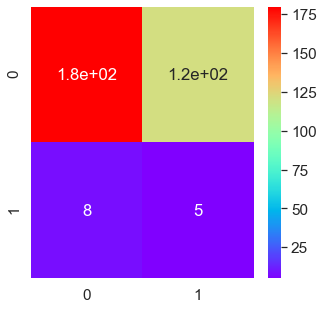

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot = True, cmap = 'rainbow')

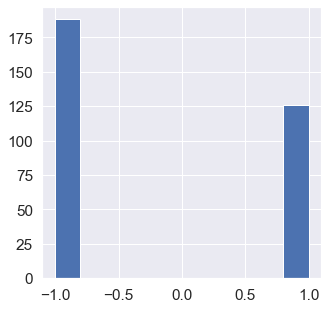

In [53]:
pd.Series(y_pred).hist()

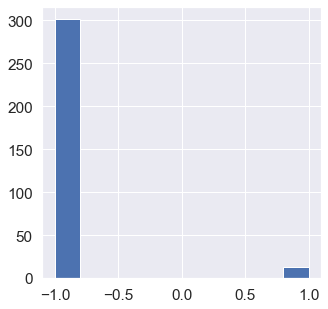

In [54]:
y_test.hist()

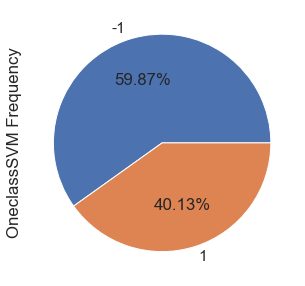

In [55]:
pd.Series(y_pred, name = "OneclassSVM Frequency").value_counts().plot.pie(autopct='%.2f%%')

### Result

- 정상 데이터 : 93.36%
- 비정상 데이터 : 6.64%


- OneClassSVM 정상 : 59.87% (-33.49%)
- OneClassSVM 비정상 : 40.13% (+33.49%)

### Elliptic Envelope

- inlier 데이터가 가우스 분포라고 가정하고 inlie 위치 및 공분산을 추정. 이후 마할라노비스 거리를 통해 이상치를 선정하는 알고리즘.

- 위의 알고리즘과 다르게 unsupervised 방식의 모델. 종속변수와 독립변수로 나누지 않고 데이터 자체를 학습

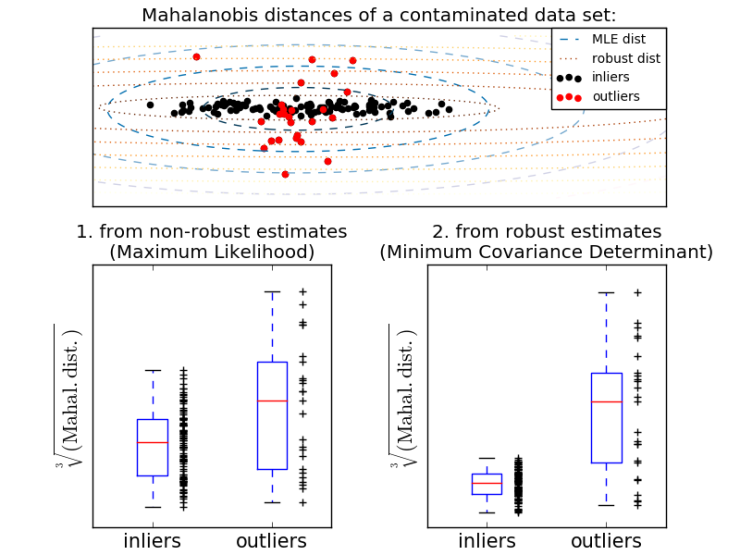

In [56]:
from sklearn.covariance import EllipticEnvelope

elliptic_data = uci.drop(["Time"],axis=1)

In [57]:
elliptic_data

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,203.172000,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,97.934373,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-0.000841,...,43.523100,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,93.494100,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


In [58]:
train_elliptic, test_elliptic = train_test_split(elliptic_data, test_size=0.2, random_state=123)
print(len(train_elliptic))
print(len(test_elliptic))

1253
314


In [59]:
cov = EllipticEnvelope(random_state=0).fit(train_elliptic)

D:\anaconda\envs\opencv\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [60]:
pred = cov.predict(test_elliptic) * -1

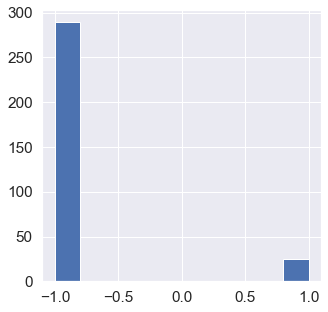

In [61]:
pd.Series(pred).hist()

In [62]:
cov.covariance_

array([[ 5.55223223e+03, -8.52868698e+02,  1.46860017e+01, ...,
        -1.98445818e-03, -1.39847587e+01,  1.77151351e+00],
       [-8.52868698e+02,  6.80855137e+03,  3.78008257e+01, ...,
        -6.55420406e-03,  3.34686617e+02, -1.66892808e+00],
       [ 1.46860017e+01,  3.78008257e+01,  7.89164854e+02, ...,
        -1.12500063e-03, -6.12439664e+01,  7.83722394e-01],
       ...,
       [-1.98445818e-03, -6.55420406e-03, -1.12500063e-03, ...,
         8.50875575e-06,  8.97391521e-02,  1.18441815e-05],
       [-1.39847587e+01,  3.34686617e+02, -6.12439664e+01, ...,
         8.97391521e-02,  5.94963127e+03, -1.35179351e+00],
       [ 1.77151351e+00, -1.66892808e+00,  7.83722394e-01, ...,
         1.18441815e-05, -1.35179351e+00,  2.17455621e-01]])

In [63]:
cov.location_

array([ 3.01388622e+03,  2.49587760e+03,  2.20032353e+03,  1.38879299e+03,
        1.30869877e+00,  1.00000000e+02,  1.01242666e+02,  1.22515028e-01,
        1.46218795e+00, -7.65256410e-04, -3.23589744e-04,  9.64936923e-01,
        2.00048423e+02,  0.00000000e+00,  9.00878974e+00,  4.12037079e+02,
        9.84093013e+00,  9.71928590e-01,  1.90207494e+02,  1.24986071e+01,
        1.40532679e+00, -5.68163833e+03,  2.71764183e+03, -3.87640915e+03,
       -3.48888694e+02,  1.22319660e+00,  1.96808907e+00,  6.78151016e+00,
        6.97239177e+01,  2.38215064e+00,  1.84952896e-01,  3.69051755e+00,
        8.50995764e+01,  8.85191138e+00,  5.03994463e+01,  6.41814034e+01,
        4.96005639e+01,  6.62130542e+01,  8.68542689e+01,  1.18493678e+02,
        6.82571627e+01,  3.22060358e+00,  7.00000000e+01,  3.55339989e+02,
        1.00329828e+01,  1.36512613e+02,  7.33136608e+02,  1.18107487e+00,
        1.40089707e+02,  1.00000000e+00,  6.31942309e+02,  1.56418455e+02,
        0.00000000e+00,  

In [64]:
pd.Series(cov.dist_).describe()

count    1.253000e+03
mean     2.308028e+09
std      4.682343e+10
min      2.614380e+02
25%      3.454830e+02
50%      3.962555e+02
75%      1.142368e+03
max      9.996342e+11
dtype: float64

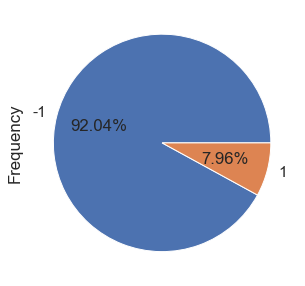

In [65]:
pd.Series(pred, name = "Frequency").value_counts().plot.pie(autopct='%.2f%%')

- 의문점 : train_ellptic, test_elliptic 전부 "Pass/Fail"이라는 라벨을 포함한 데이터

- 예측값 생성에 라벨이 포함된 데이터가 들어가면 test 셋의 라벨을 그대로 따오는격이라고 생각

- 예측값과 test set의 라벨의 데이터 퍼센트를 비교

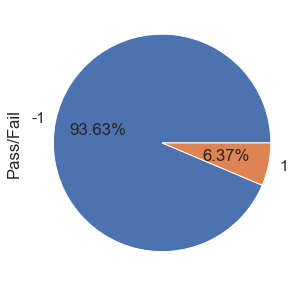

In [66]:
test_elliptic["Pass/Fail"].value_counts().plot.pie(autopct='%.2f%%')

- 두 데이터가 다름으로써 test set을 기반으로 새로운 이상치 데이터를 분류했음을 확인

### Result

- 정상 데이터 : 93.36%
- 비정상 데이터 : 6.64%

- EllipticEnvelope 정상 : 92.04% (-1.32%)
- EllipticEnvelope 비정상 : 7.96% (+1.32%)

## Summary

- 정상 데이터 : 93.36%
- 비정상 데이터 : 6.64%

---   
원본 데이터와 편차 비교
- Isolation Forest 정상 : 95.22% (+1.86%)
- Isolation Forest 비정상 : 4.78% (-1.86%)

- LOF 정상 : 92.68% (+0.68%)
- LOF 비정상 : 7.32% (-0.68%)

- OneClassSVM 정상 : 59.87% (-33.49%)
- OneClassSVM 비정상 : 40.13% (+33.49%)

- EllipticEnvelope 정상 : 92.04% (-1.32%)
- EllipticEnvelope 비정상 : 7.96% (+1.32%)

## Conclusion

- 원본과 가장 가깝게 예측하는 모델 : LOF
- 소모되는 비용이 제일 적은 모델 : Elliptic Envelope    
(비지도 학습이기 때문에 데이터를 나눌 필요가 없음. 하지만 생성된 데이터에 대한 근거 부족)
